# Milestone 1 - Model Exploration

In [2]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import random
import math

import pickle
import os
import scipy

from numpy import linalg as LA

import powerlaw # Power laws are probability distributions with the form:p(x)∝x−α
from collections import Counter
from datetime import date, timedelta
from IPython.display import clear_output

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import multilabel_confusion_matrix
import seaborn as sns

In [5]:
WD='/home/simone/Desktop/project-enterbrise/'
data_path=WD+'data/input/'


In [57]:
df_features = pd.read_csv(data_path+'train_features.csv')
df_labels = pd.read_csv(data_path+'train_labels.csv')
test_features = pd.read_csv(data_path+'test_features.csv')
test_labels = pd.read_csv(data_path+'test_labels.csv')


In [29]:
y_train=df_labels.iloc[:, 2:]
x_train=df_features.iloc[:, 2:]

In [35]:
y_test=test_labels.iloc[:, 2:]
x_test=test_features.iloc[:, 2:]

In [30]:
# Fitting Random Forest Classification to the Training set
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 42)
classifier.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=42)

In [40]:
# Predicting the Test set results
y_pred = classifier.predict(x_test)

In [53]:
y_pred.shape

(665, 93)

In [58]:
# print(metrics.classification_report(y_pred, y_test))

In [45]:
cm = accuracy_score(y_test, y_pred)
cm

0.7308270676691729

In [52]:
vis_arr = multilabel_confusion_matrix(y_test, y_pred)


In [54]:
labels = ["".join("c" + str(i)) for i in range(0, y_pred.shape[1])]

In [55]:
def print_confusion_matrix(confusion_matrix, axes, class_label, class_names, fontsize=14):

    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names,
    )

    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d", cbar=False, ax=axes)
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    axes.set_ylabel('True label')
    axes.set_xlabel('Predicted label')
    axes.set_title("Confusion Matrix for the class - " + class_label)

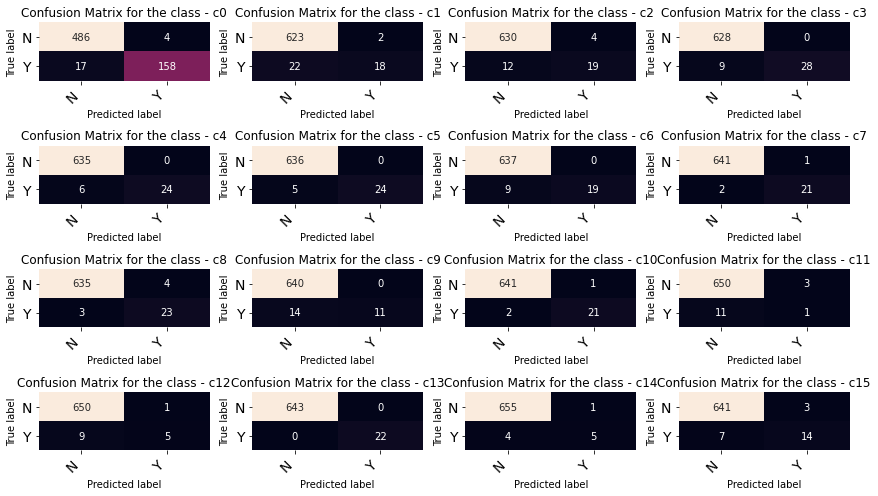

In [56]:
fig, ax = plt.subplots(4, 4, figsize=(12, 7))
    
for axes, cfs_matrix, label in zip(ax.flatten(), vis_arr, labels):
    print_confusion_matrix(cfs_matrix, axes, label, ["N", "Y"])

fig.tight_layout()
plt.show()